## Part 1: Data Exploratory

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Reading the data

Getting the data of the dataset.

In [2]:
# Reading the 'creditcard.csv' file and storing it in a dataset
df = pd.read_csv('creditcard.csv')

# Displaying the first 5 rows to help understand what the dataset consists of 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Getting the shape of the dataset.

In [3]:
# Displaying the dimensions of the dataset
df.shape

(284807, 31)

Getting the data types of each variable

In [4]:
# Displaying the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The above shows that there are no null values in the dataset. The data types of the features are either float64 or int64.

Time, Amount and Class are the only features that can be seen, that is they are the only features that we know what they represent exactly. Principal Component Analysis (PCA) was used to reduce the dimensionality of the features, V1 to V28.

Unique Values

The unique values of every column will be determined. This will help determine if there are any duoplicate values.

In [5]:
# Unique values of each column
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

The above shows that there are duplicate values. The next step is to see how many duplicate values the dataset has and then drop these values.

Dropping the duplicate values

In [6]:
# Counting the number of duplicate rows in the dataset
df.duplicated().sum()

1081

There are a total of 1081 duplicate values. These values will be dropped.

In [7]:
# Removing the duplicate rows from the dataset
df.drop_duplicates(keep = 'first', inplace = True)
# Making sure that there are no more duplicate rows
df.duplicated().sum()

0

This confirms that all the duplicate rows have been dropped.

Splitting the data

Splitting the data into input features which will be put under features and the output feature which will be the target.

In [8]:
# Separating the features and target variable
# Input features
features = df.iloc[:,:-1]
# Output feature - Class
target = df.iloc[:,-1]

In [9]:
# Displaying the a few rows of the dataset containing the features variables
features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [10]:
# Displaying the a few rows of the dataset containing the target variable, Class
target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [11]:
# Counting the number of times each unique value appears 
target.value_counts()

0    283253
1       473
Name: Class, dtype: int64

The above shows that the dataset is highly imbalanced. There are more non-fraudulent transactions than fraudulent transactions.

Plotting the target variable

Plotting the count of fraudulent and non-fraudulent transactions in the Class column.

<AxesSubplot:xlabel='Class', ylabel='count'>

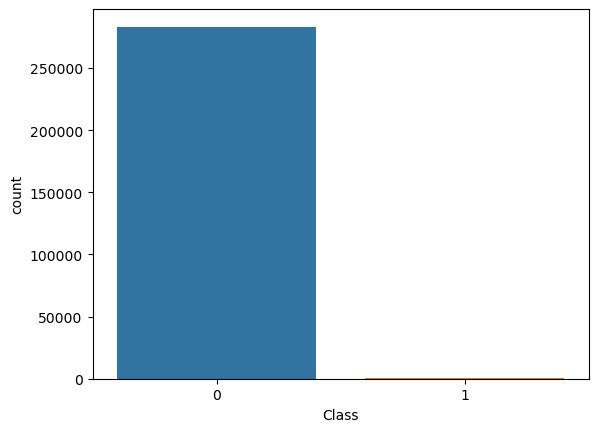

In [12]:
# Count plot of the Class column
sns.countplot(data = df, x = 'Class')

As the count plot shows, the majority of the transactions are non-fraudulent which can be seen by the height of the blue bar. The red bar shows the fraudulent transactions. This shows that the dataset is highly imbalanced.

Correlation between features and target

<BarContainer object of 30 artists>

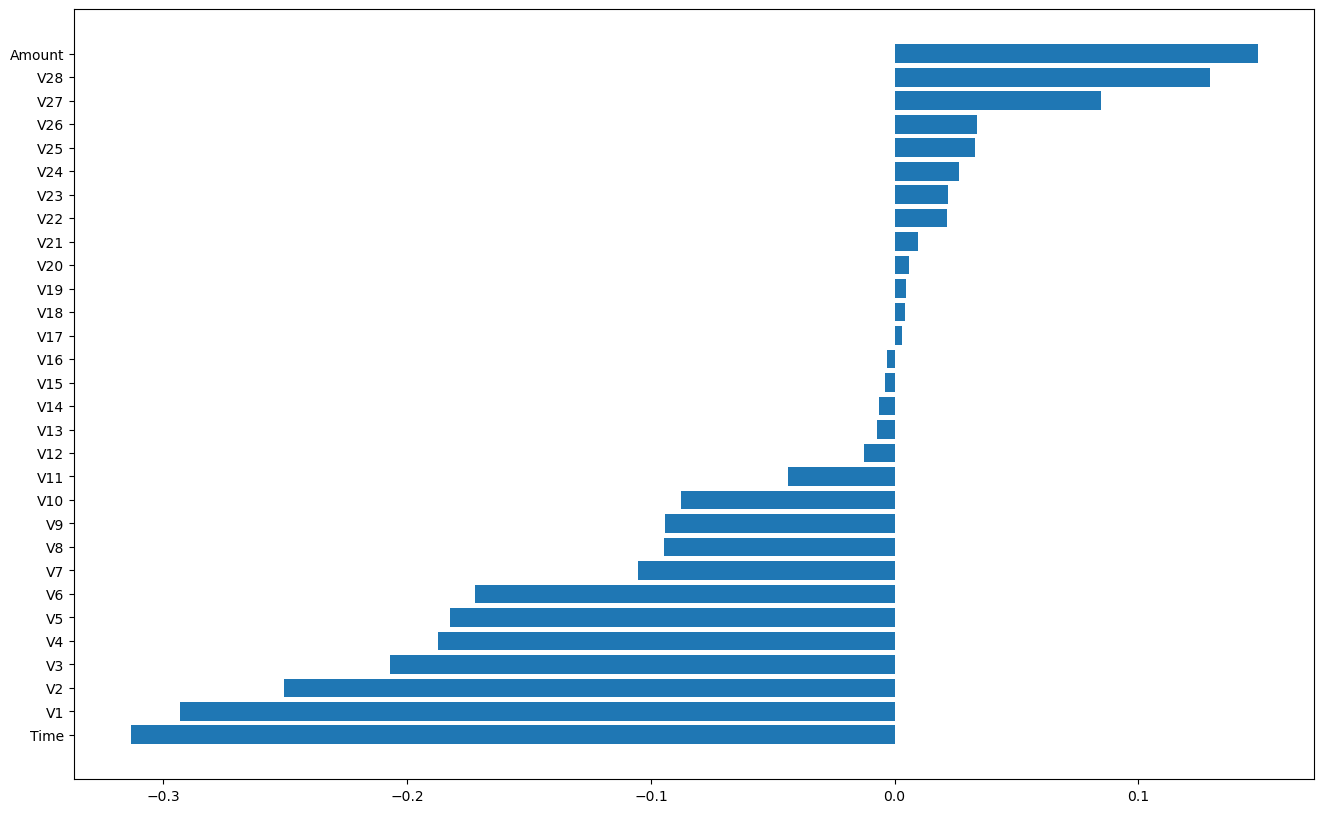

In [13]:
# Getting the list of columns from the dataset, excluding Class
col = df.describe().transpose().index
col = col.tolist()
col.remove('Class')

# Initializing an empty list so the correlation of values between features and target are stored in the list 
correlation = []

# Looping through each feature to calculate the correlation with 'Class'
for i in col:
    correlation.append(np.corrcoef(df[i], df['Class'])[0,1])
    
# Sorting the values in ascending order
correlation.sort()

# Creating a horizontal bar plot to plot the correlation for each feature
fig, ax = plt.subplots(figsize=(16,10))
ax.barh(col, correlation)

Dropping the features with low correlation

Dropping V14, V15, V16, V17, V18, V19 and V20 since they have a low correlation.

In [14]:
df.drop(df[['V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20']], axis = 1, inplace = True)
# Printing the columns to make sure that the above columns were dropped
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'],
      dtype='object')

It shows that the features with a low correlation were dropped.

## Part 2: Machine Learning and Deep Learning Algorithms

In [15]:
# Importing the machine learning algorithms
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [16]:
# Importing the performance metrics- confusion matrix, accuracy, precision, recall, auc, f1-score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [17]:
# Installing the imbalanced-learn package. This will be used to import the necessary packages.
!pip install -U imbalanced-learn

In [18]:
# Importing the oversampling- SMOTE
from imblearn.over_sampling import SMOTE

Splitting the dataset into train and test

In [19]:
# Defining the input features and output feature
X = df.drop(['Class'], axis = 1) # Input features
Y = df['Class'] # Output feature

Scaling the features so that the input features are on a similar scale which makes the algorithms run faster and achieve a better performance.

In [20]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
# Importing the train_test_split
from sklearn.model_selection import train_test_split
# Splitting the dataset into train and test. Test size of 0.3. 70/30 split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 2, test_size = 0.3)

### Oversampling

Logistic Regression

In [22]:
# Applying SMOTE to balance the data in the training dataset
LR_smote = SMOTE(random_state = 2)
x_train_smote, y_train_smote = LR_smote.fit_resample(x_train, y_train)

# Defining the algorithm
logistic_regression = LogisticRegression()

# Fitting the algorithm and making predictions on the testing dataset
logistic_regression.fit(x_train_smote, y_train_smote)
y_pred = logistic_regression.predict(x_test)

# Calculating the performance metrics
confmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
auc = roc_auc_score(y_test, y_pred, average = 'weighted')
f1score = f1_score(y_test, y_pred, average = 'weighted')

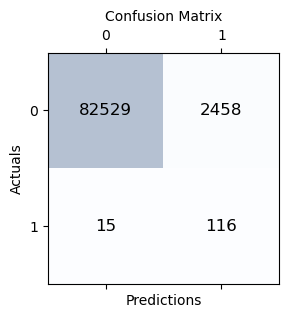

In [23]:
confmatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (3,3))
ax.matshow(confmatrix, cmap = plt.cm.Blues, alpha = 0.3)

for i in range (confmatrix.shape[0]):
    for j in range (confmatrix.shape[1]):
        ax.text(x = j, y = i, s = confmatrix[i, j], va = 'center', ha = 'center', size = 'large')

plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [24]:
# calculating the average of each performance metric and multiplying by 100 to print it as a percentage
# printing the accuracy
print("Accuracy: {:.2f}%".format(np.mean(accuracy) * 100))
# printing the precision
print("Precision: {:.2f}%".format(np.mean(precision) * 100)) 
# printing the recall
print("Recall: {:.2f}%".format(np.mean(recall) * 100))
# printing the AUC score
print("AUC Score: {:.2f}%".format(np.mean(auc) * 100))
# printing the f1-score
print("F1-Score: {:.2f}%".format(np.mean(f1score) * 100))

Accuracy: 97.09%
Precision: 99.83%
Recall: 97.09%
AUC Score: 92.83%
F1-Score: 98.39%
